#### Install the required package

*Googletrans is used to determine the language of the articles.*

In [1]:
!pip install googletrans

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_latest_p36/bin/python -m pip install --upgrade pip' command.


In [2]:
from googletrans import Translator
t = Translator().detect("hello world lsdf safdjdfsa dsfaj sadfjlsdfa;")
print(t.lang)
print(t.confidence)

en
1.0


In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import numpy as np

pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
for line in open("./data/CORD19-NER/CORD-NER-full.json", 'r'):
    cord19_ner = json.loads(line)
    print(cord19_ner.keys())
    #print("\n")
    #print(len(cord19_ner["entities"]))
    #print("\n")
    #print(cord19_ner["entities"])
    df = pd.DataFrame.from_records(cord19_ner["entities"])
    break

dict_keys(['id', 'source', 'doi', 'pmcid', 'pubmed_id', 'publish_time', 'authors', 'journal', 'title', 'abstract', 'body', 'entities'])


### Save the Entities to a CSV file for further analysis

In [5]:
entities_list = []
non_english_list = []
empty_body_article = []
i = 0
for line in open("./data/CORD19-NER/CORD-NER-full.json", 'r'):
    cord19_ner = json.loads(line)
    if cord19_ner["id"]%1000 == 0:
        print (f"Processing {cord19_ner['id']}...")
               
    
    ### If body exists, check the language of the body. Otherwise, check the language for abstract. If both body and 
    ### abstract dont't exist, check for the title.
    ### If there is no title either, then article is empty and is ignored.
               
    text_to_check = cord19_ner['body']
    if len(text_to_check) < 5:
        text_to_check = cord19_ner['abstract']
        if len(text_to_check) < 5:
            text_to_check = cord19_ner['title']
    
    for item in cord19_ner["entities"]:
            item["id"] = cord19_ner["id"]
            item["title"] = cord19_ner["title"]
            
    if len(text_to_check) < 5:
        empty_body_article.append(cord19_ner["id"])
    else:
        try:
            article_lang = Translator().detect(text_to_check).lang
            if article_lang == 'en': 
                entities_list.extend(cord19_ner["entities"])
            else:
                non_english_list.append(cord19_ner["id"])
        except:
            print(f"Language detections failed for {cord19_ner['id']}")

Processing 0...
Processing 1000...
Processing 2000...
Processing 3000...
Processing 4000...
Processing 5000...
Processing 6000...
Processing 7000...
Language detections failed for 7027
Processing 8000...
Language detections failed for 8494
Processing 9000...
Processing 10000...
Processing 11000...
Processing 12000...
Processing 13000...
Processing 14000...
Language detections failed for 14370
Language detections failed for 14564
Language detections failed for 14719
Language detections failed for 14898
Processing 15000...
Language detections failed for 15693
Processing 16000...
Language detections failed for 16843
Processing 17000...
Processing 18000...
Processing 19000...
Processing 20000...
Processing 21000...
Processing 22000...
Processing 23000...
Processing 24000...
Processing 25000...
Processing 26000...
Processing 27000...
Processing 28000...
Processing 29000...


In [6]:
cord19_ner["id"]

29499

In [7]:
print (f" There were {len(non_english_list)} articles in the dataset")

 There were 102 articles in the dataset


In [8]:
for line in open("./data/CORD19-NER/CORD-NER-full.json", 'r'):
    cord19_ner = json.loads(line)
    if cord19_ner["id"] == non_english_list[7]:
        print(cord19_ner)
        break

{'id': 555, 'source': 'CZI', 'doi': '10.1016/S1473-3099(20)30068-2', 'pmcid': '', 'pubmed_id': '', 'publish_time': '2020', 'authors': 'Thompson, Robin', 'journal': 'The Lancet Infectious Diseases', 'title': 'Pandemic potential of 2019-nCoV', 'abstract': '', 'body': '', 'entities': [{'text': '2019', 'start': 22, 'end': 26, 'type': 'DATE'}, {'text': 'nCoV', 'start': 27, 'end': 31, 'type': 'CORONAVIRUS'}]}


In [9]:
print(f" There were {len(empty_body_article)} articles with empty title and body")

 There were 72 articles with empty title and body


In [10]:
empty_body_article[0:5]

[3941, 4326, 18434, 23727, 23765]

In [11]:
for line in open("./data/CORD19-NER/CORD-NER-full.json", 'r'):
    cord19_ner = json.loads(line)
    if cord19_ner["id"] == empty_body_article[0]:
        print(cord19_ner)
        break

{'id': 3941, 'source': 'PMC', 'doi': 'http://dx.doi.org/10.7189/jogh.03.010201', 'pmcid': 'PMC3700025', 'pubmed_id': '', 'publish_time': '2013 Jun', 'authors': 0, 'journal': 'J Glob Health', 'title': 'NEWS', 'abstract': '', 'body': '', 'entities': []}


#### Convert enties into Pandas dataset

In [12]:
len(entities_list)

10192493

In [13]:
entities_df = pd.DataFrame.from_records(entities_list)
entities_df.head()

,text,start,end,type,id,title
0,Angiotensin-converting enzyme 2,0,31,GENE_OR_GENOME,0,Angiotensin-converting enzyme 2 (ACE2) as a SARS-CoV-2 receptor: molecular mechanisms and potential therapeutic target
1,ACE2,33,37,GENE_OR_GENOME,0,Angiotensin-converting enzyme 2 (ACE2) as a SARS-CoV-2 receptor: molecular mechanisms and potential therapeutic target
2,SARS-CoV-2,44,54,CORONAVIRUS,0,Angiotensin-converting enzyme 2 (ACE2) as a SARS-CoV-2 receptor: molecular mechanisms and potential therapeutic target
3,receptor,55,63,CHEMICAL,0,Angiotensin-converting enzyme 2 (ACE2) as a SARS-CoV-2 receptor: molecular mechanisms and potential therapeutic target
4,SARS-CoV-2,120,130,CORONAVIRUS,0,Angiotensin-converting enzyme 2 (ACE2) as a SARS-CoV-2 receptor: molecular mechanisms and potential therapeutic target


In [14]:
#### Save the data into a CSV file
entities_df.to_csv("./data/entities_collection.csv",index=False)

In [15]:
print (f" There are {entities_df.id.unique().shape[0]} articles") 

 There are 28985 articles


In [16]:
entities_df.tail(10)

,text,start,end,type,id,title
10192483,150,4431,4434,CARDINAL,29499,
10192484,CoV,4435,4438,CORONAVIRUS,29499,
10192485,half-life,4543,4552,GENE_OR_GENOME,29499,
10192486,HCoV,4556,4560,CORONAVIRUS,29499,
10192487,half-life,4596,4605,GENE_OR_GENOME,29499,
10192488,SARS,4609,4613,CORONAVIRUS,29499,
10192489,CoV,4614,4617,CORONAVIRUS,29499,
10192490,surface,4704,4711,CELL_COMPONENT,29499,
10192491,153,4727,4730,CARDINAL,29499,
10192492,"Figures S1-S5) , so we advise caution in interpreting this",4749,4807,CHEMICAL,29499,


In [17]:
entities_df.type.value_counts()

CHEMICAL                2091514
GENE_OR_GENOME          1916419
DISEASE_OR_SYNDROME      848750
CARDINAL                 752840
DATE                     686471
                         ...   
EDUCATIONAL_ACTIVITY       1716
LANGUAGE                   1536
PHYSICAL_SCIENCE           1409
GROUP_ATTRIBUTE             845
ARCHAEON                    496
Name: type, Length: 63, dtype: int64

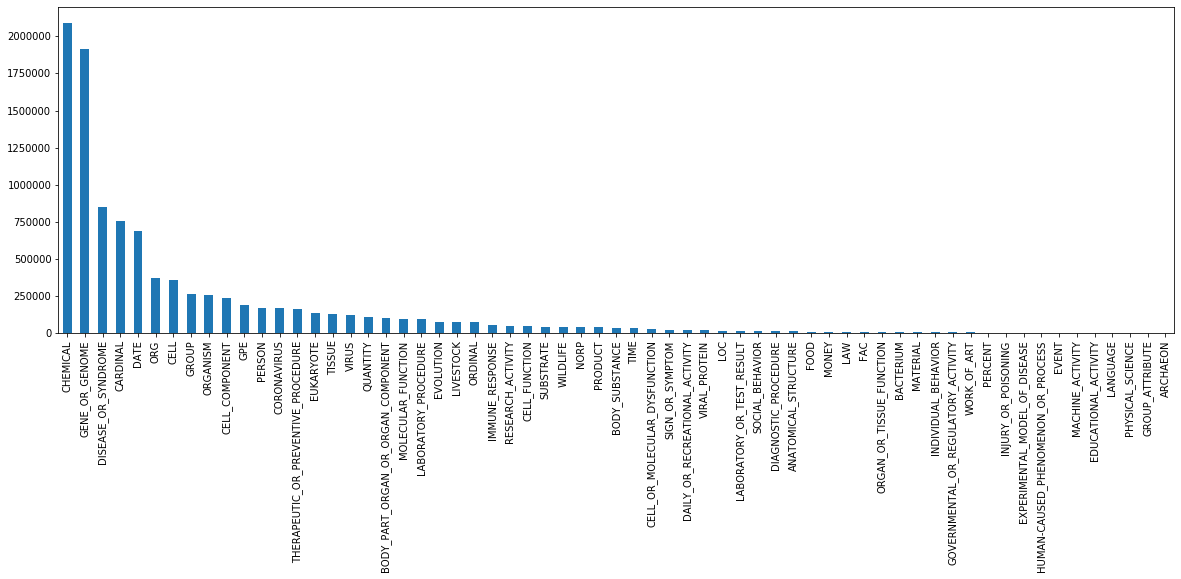

In [18]:
entities_df.type.value_counts().plot.bar(figsize=(20,6))

#### Figure out the top words for each category

*First figure out all the characters that exist in the text*

In [19]:
character_counter = Counter(entities_df['text'].str.cat())

In [20]:
character_counter

Counter({'A': 824404,
         'n': 5808831,
         'g': 1387161,
         'i': 7098238,
         'o': 5293498,
         't': 5526026,
         'e': 8569952,
         's': 5808815,
         '-': 745741,
         'c': 3700447,
         'v': 1005300,
         'r': 4857298,
         ' ': 4764671,
         'z': 201111,
         'y': 1397468,
         'm': 2491025,
         '2': 872841,
         'C': 868370,
         'E': 396790,
         'S': 707115,
         'R': 636350,
         'V': 527167,
         'p': 2398332,
         'h': 1633419,
         'l': 4226442,
         'b': 953597,
         'a': 6128479,
         'd': 2040196,
         'X': 46245,
         'u': 2482831,
         'k': 308999,
         'W': 63393,
         'f': 1154222,
         '[': 128977,
         '7': 292966,
         '6': 315489,
         '3': 536994,
         '9': 313674,
         '4': 430628,
         '8': 278291,
         'O': 154105,
         'x': 276723,
         'j': 50675,
         'Z': 39751,
         'H': 37

In [21]:
entities_df.start.diff()

0            nan
1          33.00
2          11.00
3          11.00
4          65.00
            ... 
10192488   13.00
10192489    5.00
10192490   90.00
10192491   23.00
10192492   22.00
Name: start, Length: 10192493, dtype: float64

In [22]:
entities_df[entities_df.text.str.contains('省')]

,text,start,end,type,id,title


In [23]:
for line in open("./data/CORD19-NER/CORD-NER-full.json", 'r'):
    cord19_ner = json.loads(line)
    if cord19_ner["id"] == 1150:
        print(cord19_ner)
        break

{'id': 1150, 'source': 'CZI', 'doi': '10.3760/cma.j.issn.cn112148-20200220-00106', 'pmcid': '', 'pubmed_id': '32118393', 'publish_time': '2020', 'authors': 'Wei, Z. Y.; Qian, H. Y.', 'journal': 'Zhonghua xin xue guan bing za zhi', 'title': 'Myocardial injury in patients with COVID-19 pneumonia', 'abstract': '自2019年12月以来，中国湖北省开始出现了2019新型冠状病毒（2019-nCoV）感染疫情并逐渐扩散至其他省份乃至其他国家。该病毒具有传播能 力强、临床表现多样、潜伏期长、可隐性传染等特征，对人类生命安全和健康造成严重威胁。随着病例数的不断增加和临床资料的不断丰富，2019-nCoV感 染患者除了典型的呼吸系统表现外，与病毒感染相关的心肌损伤情况逐渐受到重视。根据已公布的资料，我们总结了目前已知的2019-nCoV感染患者的心肌 损伤表现、特征、对病情及预后的影响，并对可能的损伤机制、治疗方法以及未来的研究方向作一论述。.', 'body': '', 'entities': [{'text': 'patients', 'start': 21, 'end': 29, 'type': 'GROUP'}, {'text': 'COVID-19', 'start': 35, 'end': 43, 'type': 'CORONAVIRUS'}, {'text': 'pneumonia', 'start': 44, 'end': 53, 'type': 'DISEASE_OR_SYNDROME'}, {'text': '2019年12月以来，中国湖北省开始出现了2019新型冠状病毒（2019', 'start': 55, 'end': 91, 'type': 'DATE'}, {'text': 'nCoV）感染疫情并逐渐扩散至其他省份乃至其他国家。该病毒具有传播能 力强、临床表现多样、潜伏期长、可隐性传染等特征，对人类生命安全和健康造成严重威胁。随着病例数的不断增加

In [24]:
i

0